In [1]:
from __future__ import print_function
import datetime
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('/Users/huyifan/Desktop/Index_Enhanccing_FYPPRO/uquant/data_month.csv',index_col= [0])
data0 = pd.read_csv('/Users/huyifan/Desktop/Index_Enhanccing_FYPPRO/uquant/uquant13_180310.csv',index_col= [0])

In [3]:
data0

,PB,PE,CurrentRatio,FixedAssetsTRate,ROE,NetAssetGrowRate,return,stock,tradeDate,y_m
1,-0.918870,-0.218070,0.158975,1.541652,-0.672755,-0.442178,0.025093,000002.XSHE,2013-03-29,2013-03
2,-0.937999,-1.048394,0.405170,0.997325,-0.475655,-0.363043,0.012500,000063.XSHE,2013-03-29,2013-03
3,-0.094484,2.158191,-0.232119,1.680651,1.314321,0.086850,-0.059375,000066.XSHE,2013-03-29,2013-03
4,-0.357110,0.089963,-0.207825,-3.779634,-0.186212,0.003739,-0.008606,000069.XSHE,2013-03-29,2013-03
5,-0.082047,0.090798,0.904216,-0.900463,-1.213008,-0.870034,0.107835,000100.XSHE,2013-03-29,2013-03
...,...,...,...,...,...,...,...,...,...,...
13032,-0.608844,-0.401886,-0.737325,0.016087,0.151843,0.929601,-0.049767,603882.XSHG,2018-01-31,2018-01
13033,0.183552,-0.214237,-0.296799,0.588129,0.201061,-0.935397,0.106097,603899.XSHG,2018-01-31,2018-01
13034,-1.658261,-0.099693,-0.618760,1.743447,-1.002521,-0.891868,0.031140,603939.XSHG,2018-01-31,2018-01
13035,3.199559,0.900234,1.770937,1.705022,1.030332,-0.034802,0.000000,603986.XSHG,2018-01-31,2018-01


In [4]:
data_end = map(lambda x: x[0:4]+x[5:7]+x[8:10], data['calendarDate'].values.tolist())

In [5]:
factor_names =['PB','PE' ,'CurrentRatio','FixedAssetsTRate','ROE','NetAssetGrowRate']

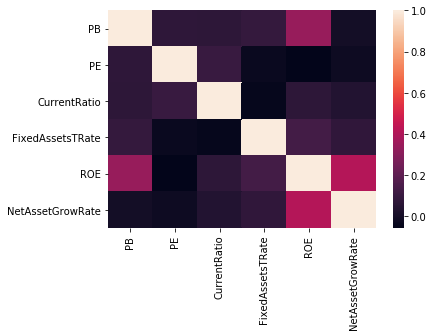

In [6]:
sns.heatmap(data0[factor_names].corr())

In [11]:
#收益率分类 每个月末交易日，前50%为1 ，后50%为0
rets=pd.DataFrame()
for d in data['calendarDate'].values[:]:
    
    
    
    lables = data0[data0['tradeDate']==d]['return']>=data0[data0['tradeDate']==d]['return'].mean()  #为分类处理数据，判断收盘价是否大于今日收盘价
    lables = lables.replace({True:'1',False:'0'})
    
    
    rets=pd.concat([rets,lables])
rets.columns=['rets']
data0=pd.concat([data0,rets],axis=1)    
df=data0


,PB,PE,CurrentRatio,FixedAssetsTRate,ROE,NetAssetGrowRate,return,stock,tradeDate,y_m,rets,rets
1,-0.918870,-0.218070,0.158975,1.541652,-0.672755,-0.442178,0.025093,000002.XSHE,2013-03-29,2013-03,1,1
2,-0.937999,-1.048394,0.405170,0.997325,-0.475655,-0.363043,0.012500,000063.XSHE,2013-03-29,2013-03,1,1
3,-0.094484,2.158191,-0.232119,1.680651,1.314321,0.086850,-0.059375,000066.XSHE,2013-03-29,2013-03,0,0
4,-0.357110,0.089963,-0.207825,-3.779634,-0.186212,0.003739,-0.008606,000069.XSHE,2013-03-29,2013-03,1,1
5,-0.082047,0.090798,0.904216,-0.900463,-1.213008,-0.870034,0.107835,000100.XSHE,2013-03-29,2013-03,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13032,-0.608844,-0.401886,-0.737325,0.016087,0.151843,0.929601,-0.049767,603882.XSHG,2018-01-31,2018-01,NaN,NaN
13033,0.183552,-0.214237,-0.296799,0.588129,0.201061,-0.935397,0.106097,603899.XSHG,2018-01-31,2018-01,NaN,NaN
13034,-1.658261,-0.099693,-0.618760,1.743447,-1.002521,-0.891868,0.031140,603939.XSHG,2018-01-31,2018-01,NaN,NaN
13035,3.199559,0.900234,1.770937,1.705022,1.030332,-0.034802,0.000000,603986.XSHG,2018-01-31,2018-01,NaN,NaN


In [12]:
df.to_csv('label.csv')

In [8]:
data0

,PB,PE,CurrentRatio,FixedAssetsTRate,ROE,NetAssetGrowRate,return,stock,tradeDate,y_m,rets
1,-0.918870,-0.218070,0.158975,1.541652,-0.672755,-0.442178,0.025093,000002.XSHE,2013-03-29,2013-03,1
2,-0.937999,-1.048394,0.405170,0.997325,-0.475655,-0.363043,0.012500,000063.XSHE,2013-03-29,2013-03,1
3,-0.094484,2.158191,-0.232119,1.680651,1.314321,0.086850,-0.059375,000066.XSHE,2013-03-29,2013-03,0
4,-0.357110,0.089963,-0.207825,-3.779634,-0.186212,0.003739,-0.008606,000069.XSHE,2013-03-29,2013-03,1
5,-0.082047,0.090798,0.904216,-0.900463,-1.213008,-0.870034,0.107835,000100.XSHE,2013-03-29,2013-03,1
...,...,...,...,...,...,...,...,...,...,...,...
13032,-0.608844,-0.401886,-0.737325,0.016087,0.151843,0.929601,-0.049767,603882.XSHG,2018-01-31,2018-01,NaN
13033,0.183552,-0.214237,-0.296799,0.588129,0.201061,-0.935397,0.106097,603899.XSHG,2018-01-31,2018-01,NaN
13034,-1.658261,-0.099693,-0.618760,1.743447,-1.002521,-0.891868,0.031140,603939.XSHG,2018-01-31,2018-01,NaN
13035,3.199559,0.900234,1.770937,1.705022,1.030332,-0.034802,0.000000,603986.XSHG,2018-01-31,2018-01,NaN


In [9]:
# 训练模型

def get_train_val_test_data(date):
        #计算前12个月，采用365天
        d_12=(datetime.datetime.strptime(date, "%Y-%m") - datetime.timedelta(days=365)).strftime('%Y-%m')
        train_df=df[(df['y_m']>=d_12) & (df['y_m']<date)]
        #train_val_df = train_val_df.sample(frac=1).reset_index(drop=True)   
        #拆分训练集、验证集                                 
        test_df =df[df['y_m']==date]   
        return train_df,test_df

def format_feature_label(origin_df, is_filter=True):
    
    #if is_filter:
        #origin_df = origin_df[origin_df['rets']!=0]
    df_test= origin_df                
    feature = origin_df[factor_names]
    label = origin_df['rets']

    return feature, label,df_test



In [10]:
#def pipeline():
df=data0
LR_model_list = []
accuracy=[]
classification=[]
final=pd.DataFrame()

for date in df['y_m'].drop_duplicates()[12:]:
    

    print('training model for %s' % date)
    train_df,test_df = get_train_val_test_data(date)
    train_feature, train_label,df_train = format_feature_label(train_df)       
    test_feature, test_label,df_test = format_feature_label(test_df)
    params1 = {'C':range(1,10,2),'gamma':[x /100. for x in range(1,10,2)],'kernel':['linear','poly','rbf','sigmoid']}
    clf_svm = svm.SVC(probability=True)
    clf_AdaBoost = AdaBoostClassifier(n_estimators = 350 , learning_rate = 1.53 ) 
    
    lr=LogisticRegression()           
    params={'C':np.arange(0.01,0.1,0.01)}
    #clf=GridSearchCV(lr,param_grid=params,)
    ada=AdaBoostClassifier( ) 
    params3={'n_estimators':[200,400,600,800,1000],'learning_rate':[0.5,1,1.5]}
    #clf=GridSearchCV(ada,param_grid=params3)
    
   # clf= GridSearchCV(clf_svm, params1)
    #clf.fit(train_feature,train_label)
    
    
    #clf_best=clf.best_estimator_
    clf_best=svm.SVC(C=9,gamma=0.09,kernel='rbf',probability=True)
    
    #clf_best=AdaBoostClassifier(n_estimators = 800 , learning_rate = 1.53 ) 
    print(clf_best)
    clf_best.fit(train_feature,train_label)
    predict_prob=clf_best.predict_proba(test_feature)[:,1] 
    #accuracy.append(clf_best.score(test_feature,test_label))
    LR_model_list.append(clf_best)
    df_test['factor'] = predict_prob
    df_test = df_test[['stock', 'tradeDate', 'rets', 'factor']]
    
    final=pd.concat([final,df_test])
    #return LR_model_list,final,accuracy
print('accuracy=%f'% (pd.Series(accuracy).mean()))
plt.plot(accuracy,label='accuracy')
final.to_csv('svm333_final.csv')

training model for 2014-03
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2014-04
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2014-05
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2014-06
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2014-07
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2014-08
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2014-09
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2014-10
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2014-11
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2014-12
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2015-01
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2015-02
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2015-03
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2015-04
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2015-05
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2015-06
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2015-07
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2015-08
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2015-09
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2015-10
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2015-11
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2015-12
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2016-01
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


training model for 2016-02
SVC(C=9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.09, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


ValueError: Input contains NaN

In [ ]:
df[['stock', 'tradeDate', 'rets']]

In [ ]:
LR_model_list